# N-body system

Consider a system of $N$ bodies under gravitational attraction. The masses are $(m_i)_{i\in I}$ and the gravitational constant is $\mathcal{G}$. The problem is to study and represent the motion of this system.

We use standard (Euclidian) coordinates $(x_{id})_{i\in I,d\in D}$ in some arbitrary inertial frame of reference.

The equations of the dynamics are given by:

\begin{equation*}
\ddot{x}_i = \sum_{j\not=i} \mathcal{G}m_j\|x_j-x_i\|^{-3}(x_j-x_i)
\end{equation*}

In [1]:
%pylab notebook
# for external animation (less resource consuming), use appropriate backend, e.g. qt5

import logging
from functools import partial
from ipyshow import Setup
from ipyshow.odesimu import System
from ipyshow.odesimu.util import logger_hook

Populating the interactive namespace from numpy and matplotlib


In [2]:
#----------------------------------------------------------------------------------------------------
class GNbody (System):
#----------------------------------------------------------------------------------------------------

  @Setup(
    'ML: list of masses of the bodies [kg]',
    'G: gravitational constant [m^3.kg^-1.sec^-2]',
    'D: dimension of the Euclidian space',
    D=2,G=1,
  )
  def __init__(self,*ML,G=None,D=None):
    self.ML,self.G,self.D = ML,G,D
    self.N = N = len(ML); self.size = size = 2*N*D
    MG = G*array(ML)[None,:,None]
    def main(t,state,ID=eye(N)[...,None]): # ID used only to avoid error on diagonal when raising to power -1.5
      X,Xʹ = state.reshape((2,N,D))
      Δ = X[None,:,:]-X[:,None,:]
      Xʺ = sum((MG*(ID+sum(square(Δ),axis=-1,keepdims=True))**-1.5)*Δ,axis=1)
      return stack((Xʹ,Xʺ),axis=0).reshape(size)
    self.main = main
    def fordisplay(state):
      X = state.reshape((2,N,D))[0,:,:2]
      return X,X
    self.fordisplay = fordisplay
    self.shadowshape = (N,2)

  def display(self,ax,refsize=50.,**ka):
    diag_s = ax.scatter((),(),s=refsize,marker='o',c='b')
    tails_l = ax.plot(*(self.N*((),(),'y')))
    ax.set_title('trajectory:?')
    def disp(t,live,tail):
      diag_s.set_offsets(live)
      for t_l,xy in zip(tails_l,swapaxes(tail,0,1)): t_l.set_data(xy.T)
      ax.relim()
      ax.autoscale_view()
    return super().display(ax,disp,**ka)

  @Setup(
      'xdxL: list of tuples of length 2D with position and speed',
  )
  def makestate(self,*xdxL):
    return swapaxes(array([(xdx[:self.D],xdx[self.D:]) for xdx in xdxL]),0,1).reshape(self.size)

  @Setup(
    System.launch,
    'refsize: average size (area) of the bodies for display [pt^2]',
    taild=10,hooks=(partial(logger_hook,logger=logging.getLogger()),)
  )
  def launch(self,*a,**ka): return super().launch(*a,**ka)

In [3]:
Setup.display(GNbody)

**** GNbody.__init__(self, *ML, G=None, D=None) ****
    ML        : list of masses of the bodies [kg]
    G         (1         ): gravitational constant [m^3.kg^-1.sec^-2]
    D         (2         ): dimension of the Euclidian space []
**** GNbody.launch(self, *a, **ka) ****
    ini       : initial state []
    srate     (25.0      ): sampling rate [sec^-1]
    maxtime   (inf       ): total simulation time length [sec]
    taild     (10        ): shadow duration [sec]
    listeners : listener binding (events: start,stop,step,error) []
    hooks     ((functools): list of display hooks []
    refsize   : average size (area) of the bodies for display [pt^2]
**** GNbody.makestate(self, *xdxL) ****
    xdxL      : list of tuples of length 2D with position and speed []

<IPython.core.display.Javascript object>


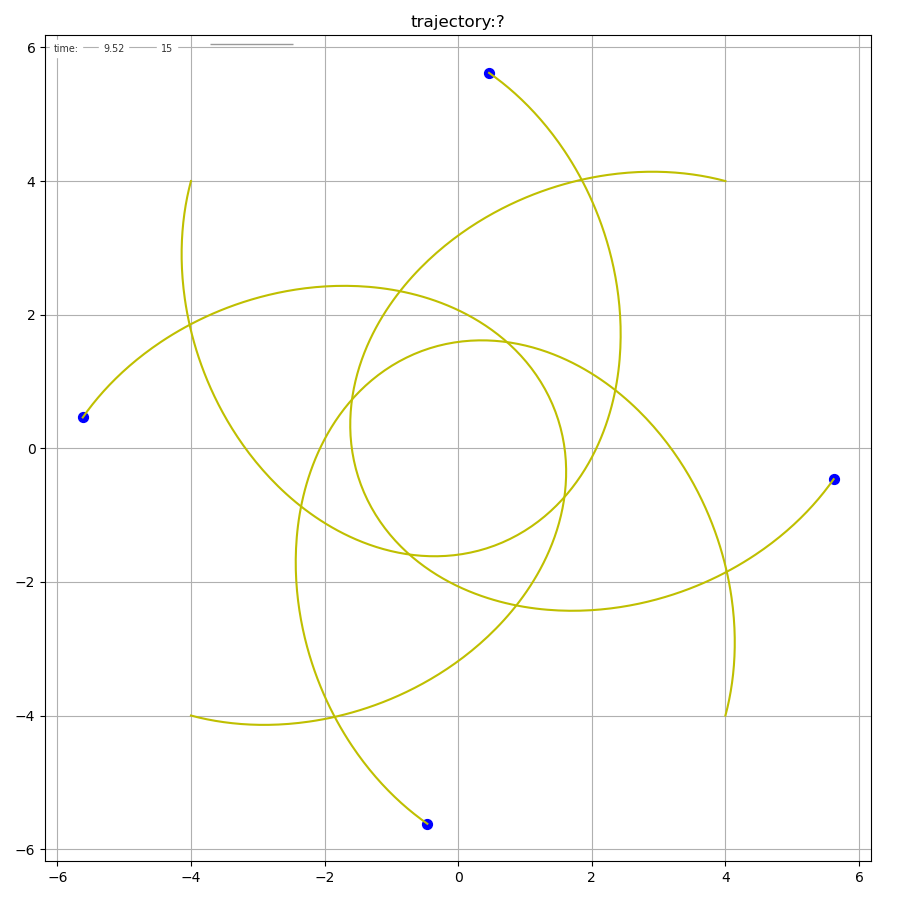

In [5]:
logging.basicConfig(level='WARN') # can be changed dynamically by logger_hook
syst = GNbody(10,10,10,10)
v = 1; u = 4; a = -pi/12; d = 0.
#v = 1; u = 4; a = pi/4; d = 0. # collision!
#v = 1; u = 4; a = -pi/12; d = .005
ini = (
  (-u,-u,v*cos(a),v*sin(a)),
  (u,-u,-v*sin(a),v*cos(a)),
  (u,u,-v*cos(a),-v*sin(a)),
  (-u,u,v*sin(a),d-v*cos(a)),
)
syst.launch(ini=syst.makestate(*ini))